In [17]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# [Convert the json data into DataFrame]

In [18]:
# import json

# # Get the data from json file
# with open('./train.json') as file:
#     data = json.load(file)

# # Print the data text and target
# count = 0
# for i in data:
#     print(data[i], ': ', i, '\n')

#     # Stop loop by undo comment
#     count += 1
#     if count == 5:
#         break

# # Convert the json file into DataFrame
# df = pd.DataFrame(columns=['News', 'Target'])

# for index in data:
#     df.loc[index] = [index, data[index]]
#     # df.append({"News": index, "Target": data[index]}, ignore_index=True)
# df.reset_index(drop=True, inplace=True)
# df.head()

# [Read the train.csv file]

In [19]:
df = pd.read_csv('train.csv', index_col=0)
print('Length of the original dataset ', len(df))
df.head(10)

Length of the original dataset  81222


,NewID,Category,Title,Abstract
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
3,N86255,health,Dispose of unwanted prescription drugs during ...,NaN
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
6,N99744,health,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."
7,N5771,health,Check Houston traffic map for current road con...,NaN
8,N124534,sports,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...
9,N51947,news,"How to record your screen on Windows, macOS, i...",The easiest way to record what's happening on ...


In [20]:
# Combine the features Title and Abstract into one & Drop the unuseful data feature columns
df['News'] = df['Title'].str.cat(df['Abstract'],sep=" ")

dataset = df.drop(['NewID', 'Title', 'Abstract'],axis='columns')
# Drop all rows that contain NaN under those columns
dataset.dropna(subset = ["News"], inplace=True)
print('Length of the dropping NaN dataset ', len(dataset))

dataset.head(10)

Length of the dropping NaN dataset  77100


,Category,News
0,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an..."
1,news,Walmart Slashes Prices on Last-Generation iPad...
2,health,50 Worst Habits For Belly Fat These seemingly ...
4,news,The Cost of Trump's Aid Freeze in the Trenches...
5,health,I Was An NBA Wife. Here's How It Affected My M...
6,health,"How to Get Rid of Skin Tags, According to a De..."
8,sports,Should NFL be able to fine players for critici...
9,news,"How to record your screen on Windows, macOS, i..."
10,weather,It's been Orlando's hottest October ever so fa...
11,health,This Guy Altered His Diet and Training to Drop...


# [Get each unique features and plot their distribution]

In [21]:
# Get the unique Catergory classes in the dataset
classes = dataset.Category.unique()
print('Number of Catergories contain ', len(classes))
classes

Number of Catergories contain  17


array(['lifestyle', 'news', 'health', 'sports', 'weather',
       'entertainment', 'foodanddrink', 'autos', 'travel', 'video', 'tv',
       'finance', 'movies', 'music', 'kids', 'middleeast', 'games'],
      dtype=object)

<AxesSubplot:>

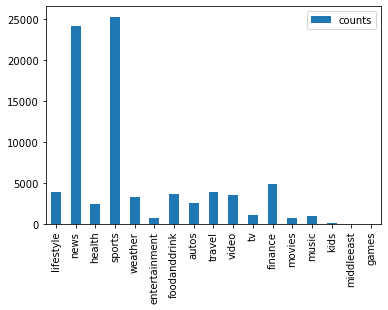

In [22]:
counts = []

for i in classes:
  count = len(df[df['Category']==i])
  counts.append(count)

categories = ['lifestyle', 'news', 'health', 'sports', 'weather',
       'entertainment', 'foodanddrink', 'autos', 'travel', 'video', 'tv',
       'finance', 'movies', 'music', 'kids', 'middleeast', 'games']

# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"counts": counts}, 
    index=categories)
# Plot a bar chart
plotdata.plot(kind="bar")

# [Vectorizing the News text values]

In [24]:
# Vectorizing the text values using CountVectorizer
x = dataset.News.values
y = dataset.Category.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

# print('text train \n', x_train, '\n')
# print('target train \n', y_train, '\n')
# print('text test \n', x_test, '\n')
# print('target test \n', y_test, '\n')
# print(type(y_train[0])) int
# y_train=y_train.astype('int')
# print(type(y_train[0])) numpy.int64
print('Length of train data', len(x_train), '\n')
print('Length of test data', len(x_test), '\n')

vectorize = CountVectorizer()
# vectorize.fit(x_train)
X_train = vectorize.fit_transform(x_train)
X_test = vectorize.transform(x_test)
print('The first new \n\n', x_train[0], '\n', X_train[0])

Length of train data 61680 

Length of test data 15420 

The first new 

 5 charged in alcohol poisoning death of UC Irvine fraternity brother Five young men have been charged in connection with the death of their fraternity brother, who succumbed to alcohol poisoning after a booze-soaked party this year. 
   (0, 11259)	2
  (0, 27686)	2
  (0, 3543)	2
  (0, 42312)	2
  (0, 15417)	2
  (0, 39006)	2
  (0, 56732)	1
  (0, 28740)	1
  (0, 22295)	2
  (0, 9150)	2
  (0, 21446)	1
  (0, 60958)	1
  (0, 35322)	1
  (0, 25548)	1
  (0, 6791)	1
  (0, 13298)	1
  (0, 60091)	1
  (0, 54787)	1
  (0, 54809)	1
  (0, 59724)	1
  (0, 53048)	1
  (0, 55342)	1
  (0, 3197)	1
  (0, 8324)	1
  (0, 50903)	1
  (0, 40639)	1
  (0, 54920)	1
  (0, 60815)	1


# [Modelling train and save the model using pickle]

In [25]:
# Train the model using LogisticRegression algorithm
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model to disk
import pickle
filename = 'lg_model.sav'
pickle.dump(model, open(filename, 'wb'))

# classifier.score(X_test, y_test)

In [29]:
# Using the saved model to get the accuracy on test data
loaded_model = pickle.load(open(filename, 'rb'))
score = loaded_model.score(X_test, y_test)
print('Accuracy ', score)

Accuracy  0.7431258106355383


In [30]:
string = vectorize.transform(["Vaping-related illnesses rise in Florida Florida had 78 reported vaping-related illnesses as of Oct. 26, according to the state Department of Health. The latest data showed an increase of eight cases in the last week, according to a News Service of Florida analysis. The number of deaths associated with the lung illnesses remained at one. The nation had 1,888 lung-injury cases associated with the use of e-cigarettes or vaping, as of ..."])
model.predict(string)

# TRAIN (health): Vaping-related illnesses rise in Florida Florida had 78 reported vaping-related illnesses as of Oct. 26, according to the state Department of Health. The latest data showed an increase of eight cases in the last week, according to a News Service of Florida analysis. The number of deaths associated with the lung illnesses remained at one. The nation had 1,888 lung-injury cases associated with the use of e-cigarettes or vaping, as of ...


array(['health'], dtype=object)

# [Testing accuracy of the model using test.csv file]

In [31]:
test_df = pd.read_csv('./test.csv', index_col=0)
test_df['News'] = test_df['Title'].str.cat(test_df['Abstract'],sep=" ")

test_dataset = test_df.drop(['NewID', 'Title', 'Abstract'],axis='columns')
test_dataset.dropna(subset = ["News"], inplace=True)

feature_test, label_test = test_dataset.News.values, test_dataset.Category.values

# vectorize.fit(x_test)
Feature_test = vectorize.transform(feature_test)

# print(X_test.shape[1])
# print(X_train.shape[1])
accuracy = loaded_model.score(Feature_test, label_test)
print("Test.csv's accuracy: ", accuracy)



Test.csv's accuracy:  0.7304860088365243
